In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

In [2]:
FRAME_SIZE = 256
HOP_LENGTH = 128
audio_path = "../data/work/4/common_voice_en_159974.mp3"

In [3]:
audio, sr = librosa.load(audio_path)
ipd.Audio(audio_path)


### 1. Pitch

In [4]:
pitch, voiced_flag, voiced_probs = librosa.pyin(
    audio, 
    fmin=librosa.note_to_hz('C2'), 
    fmax=librosa.note_to_hz('C7')
)

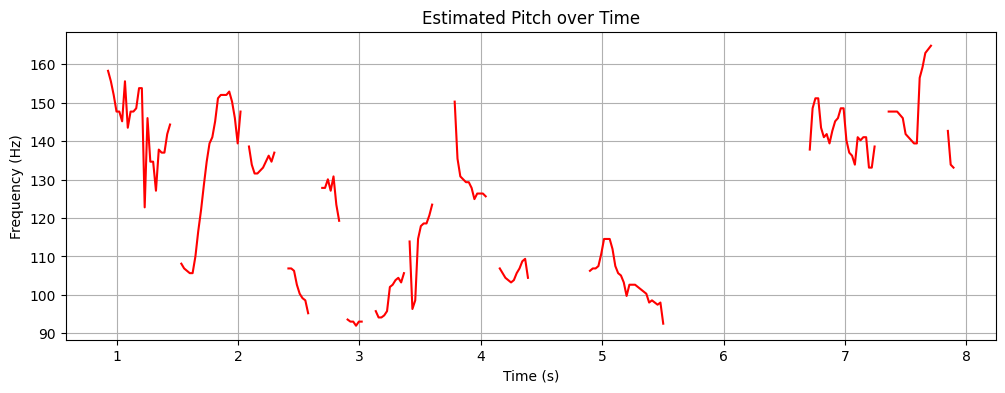

In [5]:
times = librosa.times_like(pitch)

plt.figure(figsize=(12, 4))
plt.plot(times, pitch, label='Pitch', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Estimated Pitch over Time')
plt.grid()
plt.show()

### 2. Spectrogram

In [6]:
spectrogram = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)


/tmp/ipykernel_2084399/719727465.py:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)


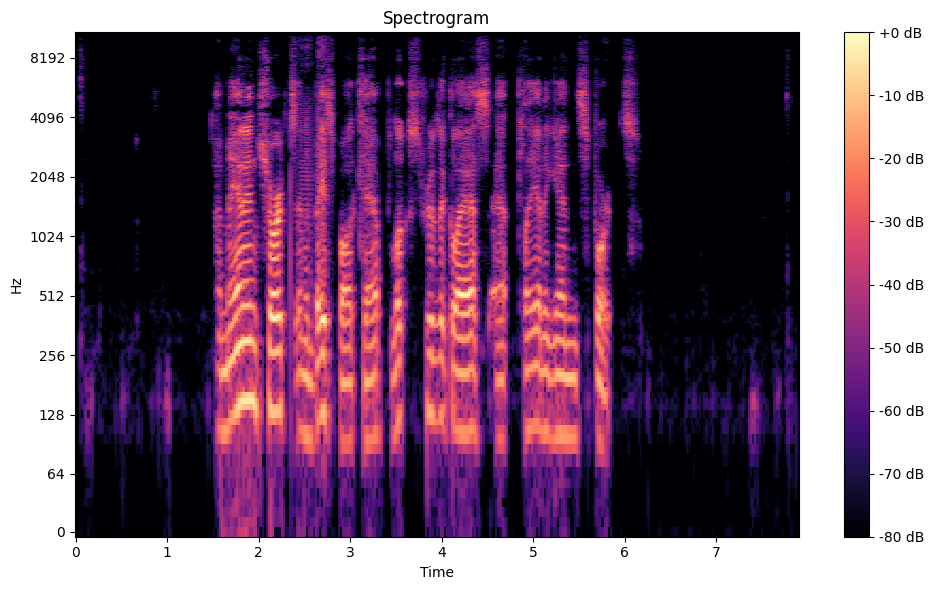

In [7]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()


### 3. Mel-Spectrogram

In [8]:
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, hop_length=HOP_LENGTH)

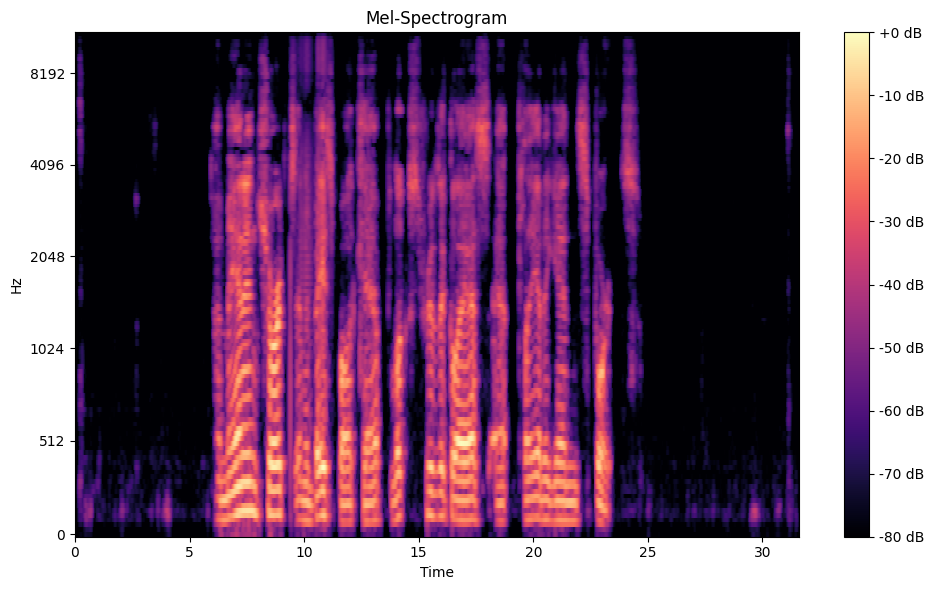

In [9]:
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.show()

### 4. MFCCs

In [10]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)

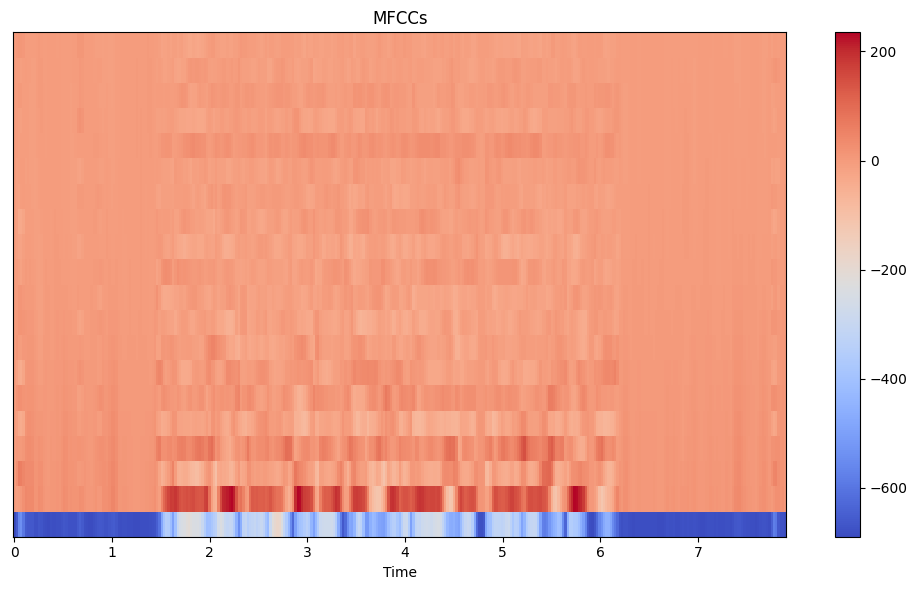

In [11]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()


### Using class FeatureExtractor

/home/ahmed/.local/lib/python3.10/site-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/media/ahmed/Programming/Programming/Projects/VoxAge/notebooks/featureExtractor.py:103: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)


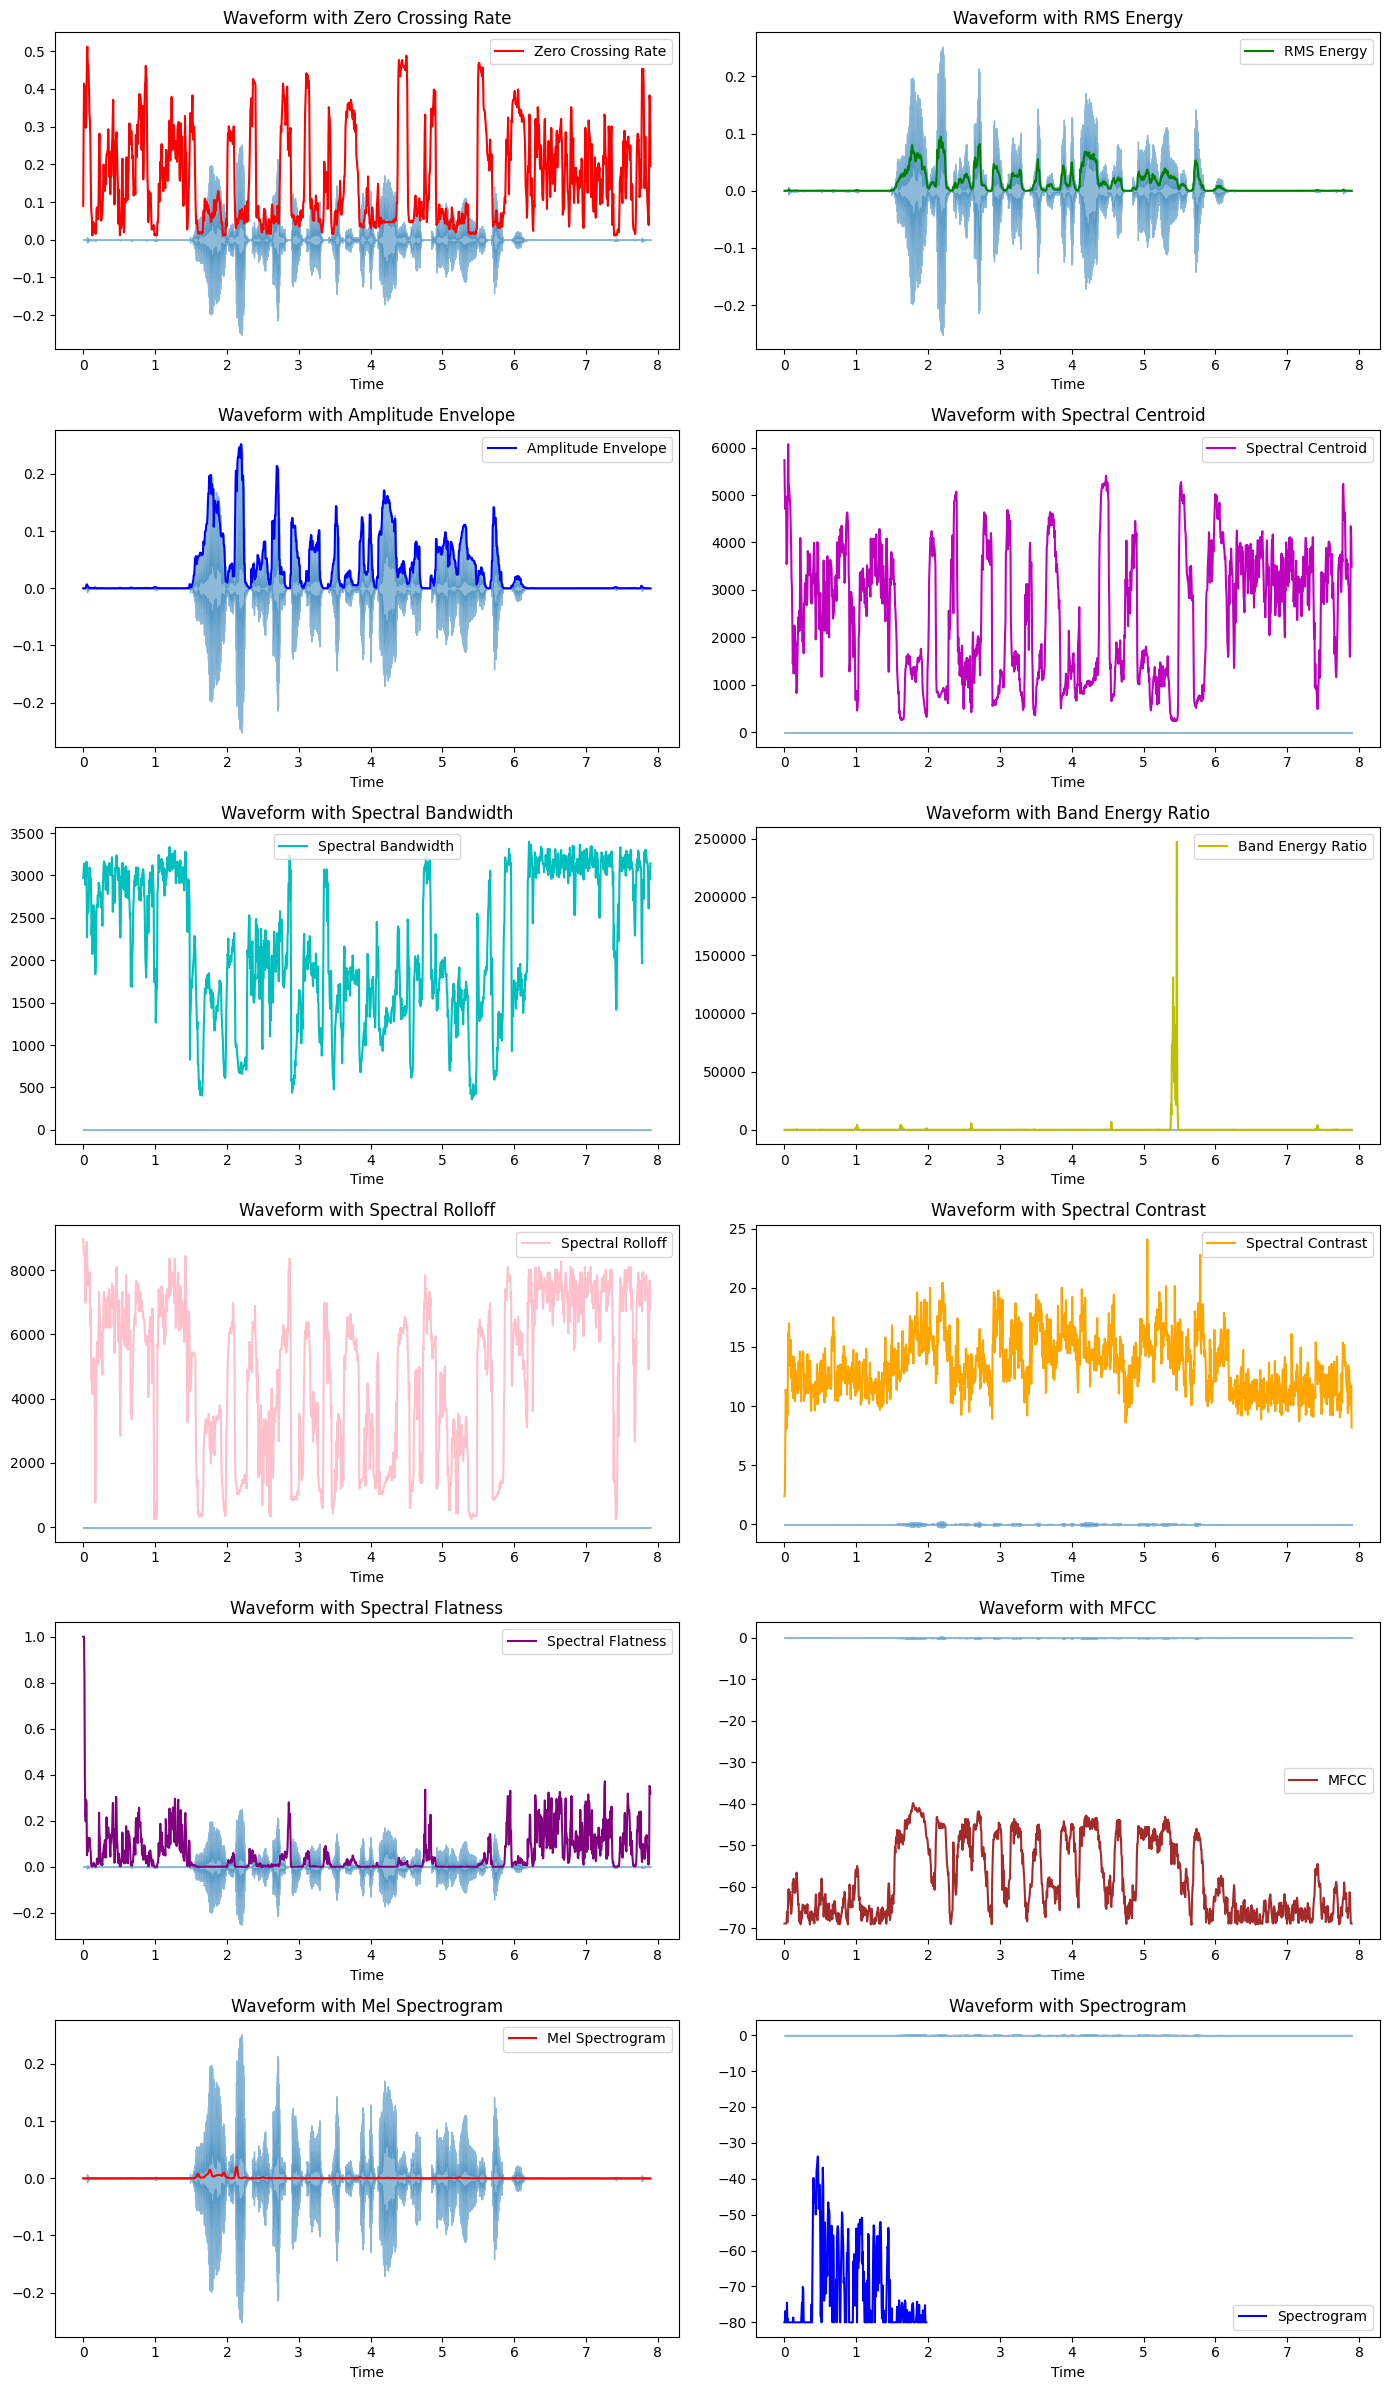

In [12]:
from featureExtractor import FeatureExtractor

extractor = FeatureExtractor(sr=sr, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH)
extractor.plot_features(audio)